In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 4.6MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=500904a1dc03d5f23d288bac548c8dae6fa61c9802dccd8f52b3df75f8725b70
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 5.0MB/s 
     |████████████████████████████████| 983kB 4.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=ceac799c279699ab1e70e3ded330b1b01e21a4c7951b5536aafab75d4d0f050f
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [10]:
df = pd.read_json('pretty_gs_tweets_request.json')
#df_sample = pd.read_csv('TwitterData.csv')



In [11]:
#Sentiment Analysis
#Vader Sentiment

In [12]:
analyzer = SentimentIntensityAnalyzer()

In [13]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [14]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [15]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [16]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

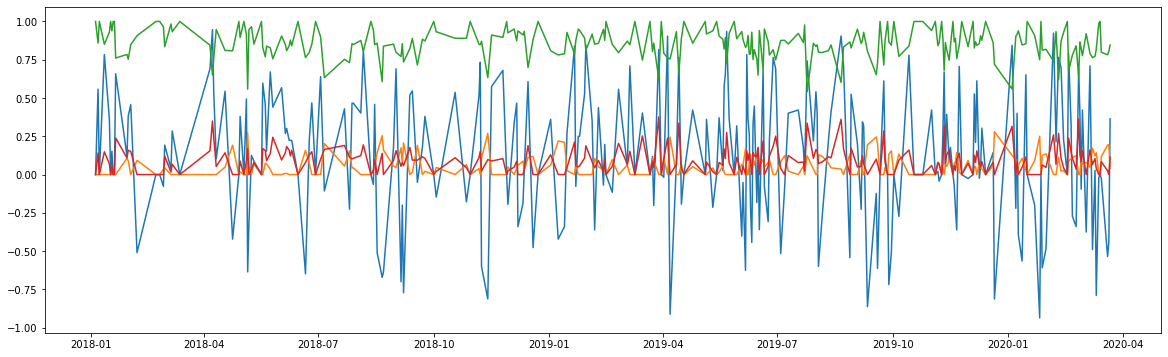

In [17]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [18]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'Hy Ann Coulter look - talk about Billion request - can you imagine How Goldman keeps supporting Maduro Goldman Sachs reaps $90 million payout on Venezuela bonds https://on.mktw.net/2H8wMwH\xa0'

In [19]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'The people have spoken...\n"Goldman Sachs decided to open a Bitcoin-trading platform after being inundated by requests to do so from its clients." #Bitcoin #BlockchainIsTheFuture\nhttp://ow.ly/fpY530kHkvI\xa0pic.twitter.com/tJl5ccjPTn'

Text(0, 0.5, 'Sentiment')

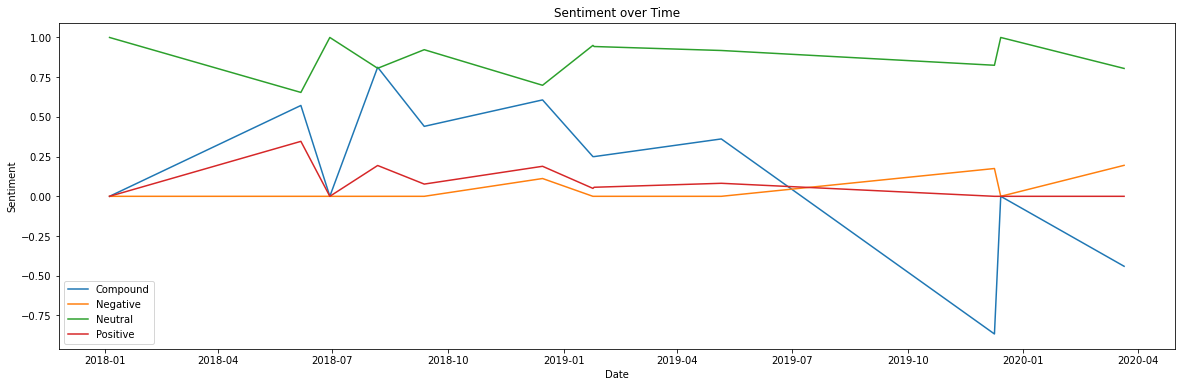

In [20]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

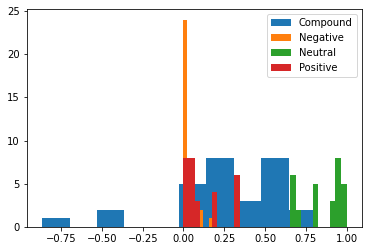

In [21]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

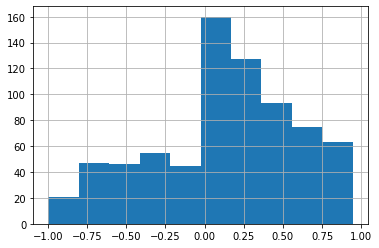

In [22]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [23]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.903,0.097,0.4404
1,0.888,0.079,0.3197
2,1.000,0.000,0.0000
3,0.808,0.000,-0.4215
4,0.811,0.142,0.5445
...,...,...,...
727,0.793,0.090,-0.2617
728,1.000,0.000,0.0000
729,0.941,0.059,0.4215
730,1.000,0.000,0.0000


In [24]:
#Importing Various twitter data
# all JP files
#Complain

#Request
df = pd.read_json('pretty_gs_tweets_request.json')


In [25]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 4.2MB/s 
     |████████████████████████████████| 552kB 33.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=2f01576d6ca228f60029186a93426b7070d3fa8c8694867cd5a7bf28df0549d1
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=db9d04a8020ddf9ff029c327bbf5c8f4350fe3d9322386c38f9f0e1c98ed169a
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [26]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [27]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(732, 198)


In [28]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [29]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [30]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [31]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,False,0,[https://on.mktw.net/2H8wMwH],,0,[],0,atrustynote,Hy Ann Coulter look - talk about Billion reque...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-30 20:14:02,2018-04-30 20:14:02,991048049043693568,/atrustynote/status/991048049043693569,937129917497724928,dale trusty,,0.000,0.903,0.097,0.4404
1,False,[dogmauling2016],[],True,False,137,[],,7,[],10,AngryBlackLady,Finally filed my request for a default judgmen...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-30 17:47:56,2018-04-30 17:47:56,991011281900658688,/AngryBlackLady/status/991011281900658688,46822887,Imani Gandy ☄️🌏🔥,,0.033,0.888,0.079,0.3197
2,False,[],[],False,False,0,[http://www.booklending.com/~B07BVBJ5WK],,0,[],0,BLFeed,REQUEST: Princess From the Bronx by Kate Goldm...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-29 14:19:24,2018-04-29 14:19:24,990596416706883584,/BLFeed/status/990596416706883584,236073812,BookLending.com,,0.000,1.000,0.000,0.0000
3,True,"[hashgraph, blockchain, techpic]",[https://pbs.twimg.com/media/DbkC39OW0AAETrx.jpg],False,False,1,[],,0,[],0,michael_goldman,No license required for usage of @hashgraph bu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-24 16:59:29,2018-04-24 16:59:29,988824763446505472,/michael_goldman/status/988824763446505473,44579340,Michael Goldman,,0.192,0.808,0.000,-0.4215
4,False,[],[],False,True,0,[],986335537568116737,0,"[{'screen_name': 'davidhogg111', 'user_id': '1...",0,B1GTEN01,What about Fidelity or Goldman Sachs? Where’s ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-18 13:40:48,2018-04-18 13:40:48,986600435577442304,/B1GTEN01/status/986600435577442304,885566995084824576,JFK,,0.048,0.811,0.142,0.5445


In [32]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [33]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.277592 -0.183560       1        1  16.372949
2      0.048222 -0.108040       2        1  13.238630
8      0.159191 -0.180984       3        1  11.135650
5     -0.039855  0.175918       4        1   9.903736
0     -0.101736  0.098744       5        1   9.778208
7      0.089452  0.100899       6        1   8.953534
1     -0.187338  0.060694       7        1   8.636641
6      0.175994 -0.017916       8        1   8.091299
4      0.160999  0.037719       9        1   7.678739
9     -0.027338  0.016526      10        1   6.210615, topic_info=       Term       Freq      Total Category  logprob  loglift
37    https  27.000000  27.000000  Default  30.0000  30.0000
55      pic  11.000000  11.000000  Default  29.0000  29.0000
44     like  19.000000  19.000000  Default  28.0000  28.0000
83  twitter  20.000000  20.000000  Default  27.0000  27.0000
50      oil  16.000000  16.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
31    happy   0.113349   6.058447  Topic10  -6.0507  -1.1998
6      bank   0.113348   6.213976  Topic10  -6.0507  -1.2252
17   credit   0.113346   9.095620  Topic10  -6.0507  -1.6062
37    https   0.113346  27.221197  Topic10  -6.0507  -2.7024
43     just   0.113345  10.997445  Topic10  -6.0507  -1.7961

[419 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         3  0.182266     able
0         9  0.364531     able
0        10  0.364531     able
1         3  0.852223      add
2         4  0.408321  america
...     ...       ...      ...
87        1  0.768440     wont
88        4  0.794313      wsj
89        1  0.355394      www
89        5  0.118465      www
89        7  0.473859      www

[219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 9, 6, 1, 8, 2, 7, 5, 10])

In [34]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.227778 -0.032474       1        1  15.269667
7      0.305103 -0.103850       2        1  13.677237
9     -0.155877  0.011060       3        1  11.618596
1     -0.077398  0.022095       4        1  11.062710
2     -0.004368  0.240166       5        1   9.890637
8     -0.076763 -0.257858       6        1   9.841755
5      0.109851 -0.014663       7        1   8.084531
3     -0.058098  0.017177       8        1   7.833493
4      0.085189  0.017706       9        1   7.412628
0      0.100140  0.100639      10        1   5.308745, topic_info=       Term       Freq      Total Category  logprob  loglift
28    sachs  20.000000  20.000000  Default  30.0000  30.0000
16     like   9.000000   9.000000  Default  29.0000  29.0000
32     time   8.000000   8.000000  Default  28.0000  28.0000
14     know   8.000000   8.000000  Default  27.0000  27.0000
23   public  10.000000  10.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
32     time   0.129278   8.638446  Topic10  -4.9033  -1.2662
12    https   0.129274  16.378221  Topic10  -4.9033  -1.9060
1       com   0.129274  20.145964  Topic10  -4.9033  -2.1130
35  twitter   0.129274  14.146228  Topic10  -4.9033  -1.7595
37      www   0.129274   9.163598  Topic10  -4.9033  -1.3252

[388 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         4  0.159444   asylum
0         8  0.797218   asylum
1         1  0.496377      com
1         3  0.148913      com
1         4  0.099275      com
...     ...       ...      ...
36        4  0.328517  vindman
36        5  0.657034  vindman
37        1  0.545637      www
37        3  0.327382      www
37        9  0.109127      www

[93 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 10, 2, 3, 9, 6, 4, 5, 1])

In [35]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.239615 -0.006522       1        1  18.460204
6     -0.177996 -0.193220       2        1  17.379957
2      0.138991  0.224623       3        1  11.198542
3      0.361957 -0.054001       4        1   9.344715
1     -0.186293  0.142445       5        1   9.237375
5     -0.088223  0.052188       6        1   8.802066
4      0.216810 -0.236591       7        1   8.625808
7      0.097875  0.196620       8        1   7.658743
9     -0.102745 -0.158025       9        1   5.442632
8     -0.020760  0.032483      10        1   3.849958, topic_info=        Term       Freq      Total Category  logprob  loglift
9      sachs  20.000000  20.000000  Default  12.0000  12.0000
5       just  12.000000  12.000000  Default  11.0000  11.0000
3       http  19.000000  19.000000  Default  10.0000  10.0000
7    records  10.000000  10.000000  Default   9.0000   9.0000
0       bank   7.000000   7.000000  Default   8.0000   8.0000
..       ...        ...        ...      ...      ...      ...
4      https   0.528934  16.005883  Topic10  -2.4849  -0.1527
8   requests   0.528934  16.395249  Topic10  -2.4849  -0.1768
3       http   0.528934  19.243883  Topic10  -2.4849  -0.3370
9      sachs   0.528934  20.971053  Topic10  -2.4849  -0.4229
2        com   0.528934  21.091831  Topic10  -2.4849  -0.4287

[132 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         6  0.887189      bank
0        10  0.126741      bank
1         3  0.558564   clients
1         6  0.279282   clients
1        10  0.139641   clients
2         1  0.331882       com
2         2  0.426705       com
2         5  0.047412       com
2         6  0.047412       com
2         9  0.094823       com
2        10  0.047412       com
3         2  0.259823      http
3         6  0.051965      http
3         7  0.519646      http
3         9  0.103929      http
3        10  0.051965      http
4         1  0.187431     https
4         2  0.249908     https
4         5  0.374862     https
4         6  0.062477     https
4        10  0.062477     https
5         8  0.932840      just
5        10  0.077737      just
6         1  0.613683       pic
6         9  0.204561       pic
6        10  0.102281       pic
7         3  0.890453   records
7        10  0.098939   records
8         1  0.182980  requests
8         3  0.182980  requests
8         5  0.426953  requests
8         6  0.060993  requests
8        10  0.060993  requests
9         3  0.095370     sachs
9         4  0.667587     sachs
9         7  0.190739     sachs
9        10  0.047685     sachs
10        1  0.684458   twitter
10        9  0.171115   twitter
10       10  0.085557   twitter
11        1  0.085700       www
11        2  0.771296       www
11       10  0.085700       www, R=12, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 3, 4, 2, 6, 5, 8, 10, 9])

In [36]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(384, 25)
(206, 25)
(142, 25)
